In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_corr_df(df1, df2, df3, df4):
    df = pd.DataFrame({'prms': ['theta', 'lambda', 'ndt', 'drift rate'],
                       'sigma = 0.3': [df1.corr()['b0_estimate']['b0_true'], 
                                       df1.corr()['lambda_estimate']['lambda_true'],
                                       df1.corr()['ndt_estimate']['ndt_true'],
                                       df1.corr()['mu1_estimate']['mu1_true']],
                       'sigma = 0.6': [df2.corr()['b0_estimate']['b0_true'], 
                                       df2.corr()['lambda_estimate']['lambda_true'],
                                       df2.corr()['ndt_estimate']['ndt_true'],
                                       df2.corr()['mu1_estimate']['mu1_true']],
                       'sigma = 0.9': [df3.corr()['b0_estimate']['b0_true'], 
                                       df3.corr()['lambda_estimate']['lambda_true'],
                                       df3.corr()['ndt_estimate']['ndt_true'],
                                       df3.corr()['mu1_estimate']['mu1_true']],
                       'No observation': [df4.corr()['b0_estimate']['b0_true'], 
                                          df4.corr()['lambda_estimate']['lambda_true'],
                                          df4.corr()['ndt_estimate']['ndt_true'],
                                          df4.corr()['mu1_estimate']['mu1_true']]}).set_index('prms')
    return df

def get_r2_df(df1, df2, df3, df4):
    
    df = pd.DataFrame({'prms': ['theta', 'lambda', 'ndt', 'drift rate'],
                       'sigma = 0.3': [r2_score(df1['b0_estimate'], df1['b0_true']),
                                       r2_score(df1['lambda_estimate'], df1['lambda_true']),
                                       r2_score(df1['ndt_estimate'], df1['ndt_true']),
                                       r2_score(df1['mu1_estimate'], df1['mu1_true'])],
                       'sigma = 0.6': [r2_score(df2['b0_estimate'], df2['b0_true']),
                                       r2_score(df2['lambda_estimate'], df2['lambda_true']),
                                       r2_score(df2['ndt_estimate'], df2['ndt_true']),
                                       r2_score(df2['mu1_estimate'], df2['mu1_true'])],
                       'sigma = 0.9': [r2_score(df3['b0_estimate'], df3['b0_true']),
                                       r2_score(df3['lambda_estimate'], df3['lambda_true']),
                                       r2_score(df3['ndt_estimate'], df3['ndt_true']),
                                       r2_score(df3['mu1_estimate'], df3['mu1_true'])],
                       'No observation': [r2_score(df4['b0_estimate'], df4['b0_true']),
                                          r2_score(df4['lambda_estimate'], df4['lambda_true']),
                                          r2_score(df4['ndt_estimate'], df4['ndt_true']),
                                          r2_score(df4['mu1_estimate'], df4['mu1_true'])]}).set_index('prms')
    return df

In [4]:
no_const_exp = pd.read_csv('_01_no_constrain/Exponential_rec.csv', index_col=0)
sig_03_exp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Exponential_rec_var1.csv', index_col=0)
sig_06_exp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Exponential_rec_var3.csv', index_col=0)
sig_09_exp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Exponential_rec_sig09.csv', index_col=0)
sig_12_exp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Exponential_rec_sig12.csv', index_col=0)

no_const_hyp = pd.read_csv('_01_no_constrain/Hyperbolic_rec.csv', index_col=0)
sig_03_hyp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Hyperbolic_rec_sig03.csv', index_col=0)
sig_06_hyp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Hyperbolic_rec_sig06.csv', index_col=0)
sig_09_hyp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Hyperbolic_rec_sig09.csv', index_col=0)
sig_12_hyp = pd.read_csv('_04_ndt_constrain_fixed_sigma/Hyperbolic_rec_sig12.csv', index_col=0)

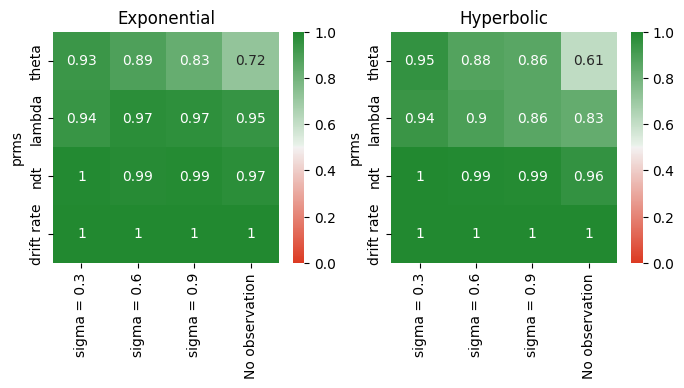

In [5]:
df_exp = get_corr_df(sig_03_exp, sig_06_exp, sig_09_exp, no_const_exp)

df_hyp = get_corr_df(sig_03_hyp, sig_06_hyp, sig_09_hyp, no_const_hyp)

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.title('Exponential')
sns.heatmap(df_exp, vmin=0, vmax=1, annot=True, 
            cmap=sns.diverging_palette(15, 130, l=50, s=90, as_cmap=True));

plt.subplot(122)
plt.title('Hyperbolic')
sns.heatmap(df_hyp, vmin=0, vmax=1, annot=True, 
            cmap=sns.diverging_palette(15, 130, l=50, s=90, as_cmap=True));

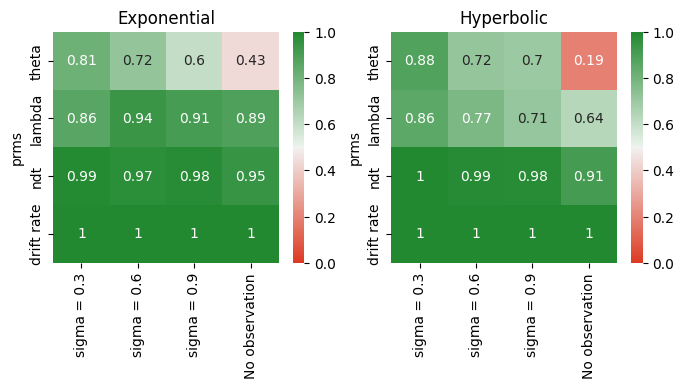

In [6]:
df_exp = get_r2_df(sig_03_exp, sig_06_exp, sig_09_exp, no_const_exp)

df_hyp = get_r2_df(sig_03_hyp, sig_06_hyp, sig_09_hyp, no_const_hyp)

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.title('Exponential')
sns.heatmap(df_exp, vmin=0, vmax=1, annot=True, 
            cmap=sns.diverging_palette(15, 130, l=50, s=90, as_cmap=True));

plt.subplot(122)
plt.title('Hyperbolic')
sns.heatmap(df_hyp, vmin=0, vmax=1, annot=True, 
            cmap=sns.diverging_palette(15, 130, l=50, s=90, as_cmap=True));